In [1]:
%load_ext rpy2.ipython

R[write to console]: Loading required package: svd

R[write to console]: Loading required package: forecast

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: 
Attaching package: ‘Rssa’


R[write to console]: The following object is masked from ‘package:stats’:

    decompose




[1] 412.8451
[1] 15.75596


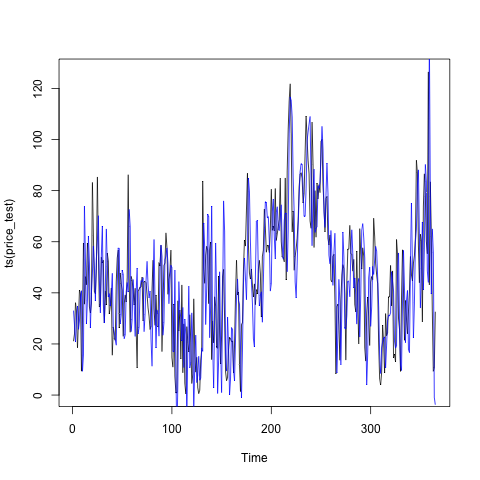

In [2]:
%%R
library(Rssa)

df = read.csv('final_daily.csv')
price = df[,"price"]
price_test = tail( price, 365 )
price_train = head( price, length(ts(df['price'])) - 365)

n = length(price); for1 = NULL

for( i in (n-365):(n-1) ){
  stmp = ssa( price[1:i], L = 24 )
  tmp = rforecast( stmp, groups = list(trend = c(1:12) ) )
  for1 = c( for1, tmp )
}

#for1 = exp(for1)
plot(ts(price_test))
lines(ts(for1), col='blue')

print(mean((ts(for1) - ts(price_test))**2))

print(mean(abs(ts(for1) - ts(price_test))))

In [3]:
%%R
error = abs(ts(price_test)-ts(for1))/abs(ts(price_test))
error[error > 1] = 1
mean(error)

[1] 0.4054478


[1] 676312825
[1] 19292.29


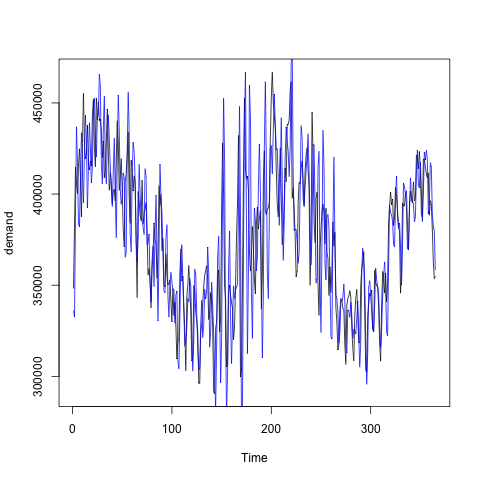

In [4]:
%%R
##Demand
demand = df[,"demand"]
demand_test = tail(df["demand"], 365)
demand_train = head(df["demand"], length(ts(df['demand'])) - 365)

n = length(demand); for1 = NULL

for( i in (n-365):(n-1) ){
  stmp = ssa( demand[1:i], L = 24 )
  tmp = rforecast( stmp, groups = list(trend = c(1:12) ) )
  for1 = c( for1, tmp )
}



plot(ts(demand_test))
lines(ts(for1), col='blue')

print(mean((ts(for1) - ts(demand_test))**2))

print(mean(abs(ts(for1) - ts(demand_test))))

In [5]:
%%R
error = abs(ts(demand_test)-ts(for1))/abs(ts(demand_test))
error[error > 1] = 1
mean(error)

[1] 0.05126683
